<a href="https://colab.research.google.com/github/RonitMalik/Python_workshop/blob/main/Customer%20Churn%20Case%20Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# for loading, manipulating data 
import pandas as pd 
import numpy as np

# for visualize our data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

Once we import all the libraries that we need, we can go ahead and import our dataset into python

In [ ]:
data = pd.read_excel('/content/Telco Customer Data.xlsx')

Once the data has been downloaded, we can view the data by using the .head() method 

In [ ]:
data.head()

We can also use the .info() method to give us a better understanding for our dataset. 

In [ ]:
data.info()

From the table above, we can see that "TotalCharges" have been tagged as an object when it should be a float, this is something we would need to change as we proceed with our data cleaning. 

From the code above, we can see the different data types we have in our dataset and also tells us the total rows and columns we have in our dataset 

In [ ]:
#the following code can be ran to understand the total null values for every variable in our dataset
data.isnull().sum()

In [ ]:
data.describe()

We can also make use of the .describe() method which can tell us more about our numeric variables in the dataset. 

#Data Cleaning 

This is where we can start cleaning our existing data and make necessary changes

In [14]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"],errors="coerce")
data["SeniorCitizen"] = data["SeniorCitizen"].map({1:'Yes', 0:'No'})

once we make the following change above, we can use the .info() method again to see if the data types have changed for Total charges and Senior Citizen variable 

In [ ]:
data.info()

As we can see from the table above, both changes have been made and "totalcharges" are now a float and "seniorcitizen" are an object 

In [ ]:
# Let us identify the null values again in our dataset after making the adjustments above 

data.isnull().sum()

In [17]:
#we can use pandas built-in capability to remove null values from our dataset. 

data.dropna(inplace=True)

Once null values have been removed from our dataset, we can then check if there are any outliers in our dataset. It is important to handle outliers within the dataset to eliminiate the risk of running an error while drawing insights

In [ ]:
#check outliers using boxplot
numeric_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, ax = plt.subplots(1,3, figsize=(15, 6))

for i, col in enumerate(numeric_col):
    ax[i].boxplot(data[col]) 
    ax[i].set_title(col)

From the boxplot above, we can see that 
Tenure is positively skewed as mean is 

*   Tenure is positively skewed as mean is greater than median 
*   Monthlycharges is negatively skewed as mean is lower than median 
*  TotalCharges is positiviely skewed as mean is greater than median 

However, we cannot see any outliers in our dataset

#Exploratory Data Analysis 

We can now start analysing our dataset to gather some insights 

Let us start by understanding some of the key elements that effect churn rate, we can create the following visual plots to understand our data better: 


*   Countplot 
*   Density Plot 
*   Pie Plot 
*   Sunburst

We can create small functions our for our visualisation which can be called everytime we want to view the diagrams. 

In [19]:
#This function is created to output a countplot distribution for male and female that Churn 

def countplot(data,x,hue=None,ax=None):
    ax = sns.countplot(data=data, x=x, hue=hue,ax=ax)
    
    # Looping over each column
    for patch in ax.patches:
        loc = patch.get_x()
        width = patch.get_width()
        height = patch.get_height()
        
        ax.text(loc+width/2, height, str(height), fontsize=15, weight="bold", ha="center")
    plt.draw()
    ax.set_title(f"{x} Distribution", fontsize=20, color="brown")
    ax.set_xlabel(x, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=15,color="brown")
    ax.set_ylabel('Count', fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)
    if hue:
        ax.legend(labels=list(data[hue].unique()),prop = {"size":15} ,frameon=True, shadow=True)

In [20]:
def kdeplot(data, col, ax=None):
    ax = sns.kdeplot(data[col][data["Churn"] == 'Yes'], color="Red", ax=ax, shade=True)
    ax = sns.kdeplot(data[col][data["Churn"] == 'No'], color="Blue", ax=ax, shade=True)
    ax.set_title(f"Distribution of {col} by churn", fontsize=17, color='brown')
    plt.draw()
    ax.set_xlabel(col, fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
    ax.set_ylabel('Density', fontsize=15)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
    ax.legend(["Churn","Not Churn"], loc='upper right', frameon=True, shadow=True);

In [21]:
def pieplot(x, labels=None,shadow=False,title_p=None):
    ax = plt.pie(x=x, labels=labels, shadow= shadow,autopct='%1.2f%%',textprops={'fontsize': 14})
    plt.title(f"{title_p}", fontsize=15, color="brown")
    plt.legend()

In [34]:
def plot_sunburst(col):
    fig = px.sunburst(data,path=[col,'Churn'],names=col)
    fig.update_layout(height=350, width=500, title_text=f'Percent of Churn by {col}')
    fig.update_traces(textinfo="label+percent parent", textfont_size=16)
    fig.show()

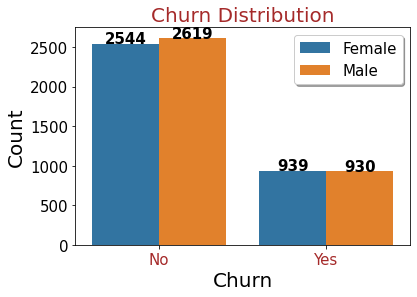

In [23]:
countplot(data,"Churn",hue="gender")

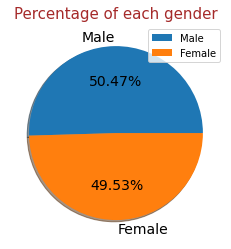

In [25]:
# To output the pie plot we would need to get the gender count, this can be down via: 

gender_count = data["gender"].value_counts()
pieplot(gender_count,labels=gender_count.index,shadow=True,title_p="Percentage of each gender")

In [39]:
# We can create different variable buckets to better undertand why customers churn. 

demographic_cols =["gender",'SeniorCitizen',"Partner",'Dependents','Churn']
services_cols =["PhoneService",'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
               'TechSupport','StreamingTV','StreamingMovies','DeviceProtection','Churn']
account_cols = ["Contract","tenure",'PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']

In [40]:
# We can use the for-loop below to output the sunburst chart for our demographic-cols 
for col in demographic_cols[:-1]:
    plot_sunburst(col)
    

We can generate the following insights from from our charts above:



*   The percentage between male and female is about the same, Churn rate is very close for male and female (26% for male and 27% for female).
*    Most of people are not senior (84%),for senior the churn rate is high (42%) compared to not senior (24%).
*    The percentage between Partener (48%) and not Partener (52%) is very close too, churn rate is high for that havn't partner (33%) and little less for that have (20%).
*    Most of them have no dependents (70%),churn rate is high for them (31%) compared to ones that have a dependents(16%)


 

In [41]:
# We can use the for-loop below to output the sunburst chart for our demographic-cols 
for col in services_cols[:-1]:
    plot_sunburst(col)

* most of people have phone service (90%) so few of them are churn(27%) and for they haven't phone service churn rate is (25%), it is close too.

* churn is little higher for Clients who have MultipleLines (29%) compared to other ones that have no multipleLine(25%) and No phone services (25%).

* most of clints use Fiber optic in their internet Service (44%) and the churn rate for them is (42%).

* churn is high for Clients that do not have Online Security
(42%),OnlineBackup (40%), TechSupport (42%) and DeviceProtection (39%).

* Also it's a little higher for the clients who do not have
StreamingTV or StreamingMovies.

In [43]:
# We can view the following output by account type, to better understand where customers churn 
for col in account_cols[:-1]:
    if data[col].dtype == 'object':
        plot_sunburst(col)

The following insights can be generated from the type of account a user is on:

* most of people on month to month system (55%) and here the higher rate of churn (43%).

* churn rate is high for Clients that use paperless billing (34%) compared to they don't use it (16%). 

* most of people pay by electronic check (34%) and here the higher rate of churn (45%).

In [44]:
count = 0
for col in account_cols[:-1]:
    if data[col].dtype != 'object':
        count += 1
count

3

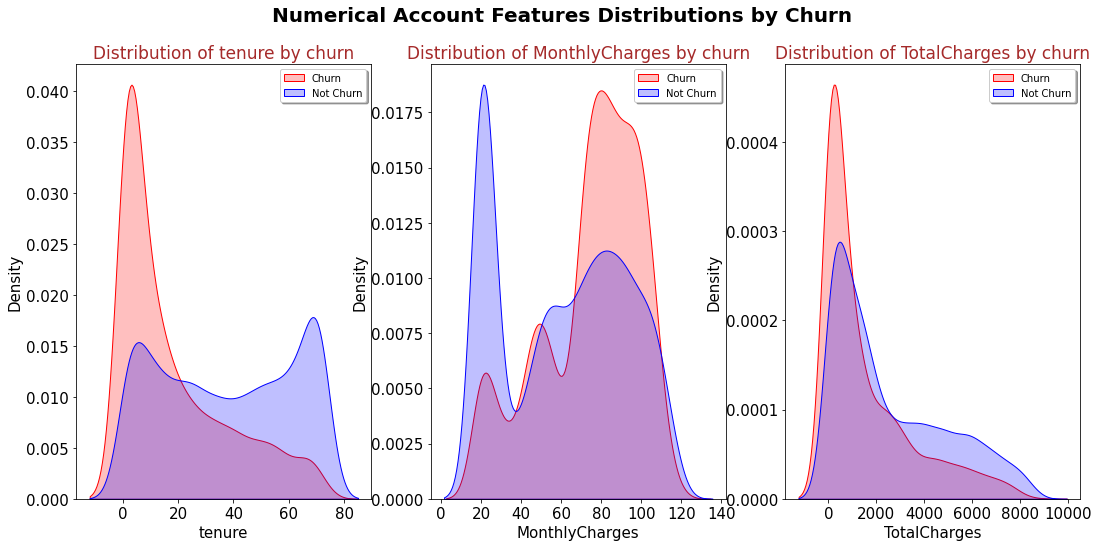

In [47]:
n=0
fig,axes= plt.subplots(nrows=1,ncols=3, figsize =(18,8))
fig.suptitle('Numerical Account Features Distributions by Churn',fontsize=20, weight='bold')
for col in account_cols[:-1]:
    if data[col].dtype != 'object':
        kdeplot(data,col,ax=axes[n])
        n+=1

As we can see: most of people almost who churn stayed between 0 to 20 months and their monthly_charge between 60 : 120 $

In [48]:
count = []
for col in account_cols[:-1]:
    if data[col].dtype != 'object':
        count.append(col)
count

['tenure', 'MonthlyCharges', 'TotalCharges']

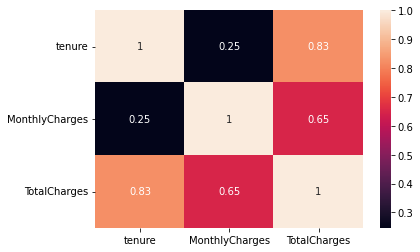

In [49]:
sns.heatmap(data[count].corr(),annot=True)

There is a weakly correlation between Tenure and MonthlyCharges, But we do see that there is a strong correlation between TotalCharges with both of MonthlyCharges and Tenure.